In [212]:
import numpy as np
import pandas as pd # read_csv, get_dummies(One-Hot Encoding)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # train/test Dataset 분리
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping, Callback
from tensorflow.keras.activations import relu, softmax # activation = 'relu' 대신 사용
from tensorflow.keras import metrics # metrics = ['accuracy']
import matplotlib.pyplot as plt

- Red Wine 품질 등급 예측

```
1. Dataset 확보 & 전처리
    독립변수, 종속변수 분리 → 독립변수 Scale 조정(StandardScaler)
    → 종속변수 One-Hot Encoding(get_dummies) → train/test Dataset(train_test_split) 분리
2. Model 구성(입력11, 출력6) layer 4개
3. Training Process Setting(다중분류에 맞는 설정)
4. Training (callbacks 이용)
5. Model 평가 - 그래프, evaluate(Test), crosstab
6. Model 저장 및 사용하기
```

## Dataset 확보 & 전처리
독립변수, 종속변수 분리 -> 독립변수 스케일조정(StandardScaler), 종속변수 원핫인코딩(get_dummies) ->
 훈련셋과 테스트셋 분리(train_test_split)

In [205]:
# 데이터 읽어오기

# np.genfromtxt('data/winequality-red.csv', delimiter=';', skip_header=1)
redwine = np.loadtxt('./data/winequality-red.csv', delimiter = ';', skiprows = 1)
redwine[:2]

# redwine = pd.read_csv('./data/winequality-red.csv', sep=';')
# redwine.head()

# fixed acidity : 고정 산도
# volatile acidity : 휘발성 산도
# citric acid : 시트르산
# residual sugar : 잔류 당분
# chlorides : 염화물
# free sulfur dioxide : 자유 이산화황
# total sulfur dioxide : 총 이산화황
# density : 밀도
# pH
# sulphates : 황산염
# alcohol
# quality : 0 ~ 10(높을 수록 좋은 품질)

array([[ 7.4   ,  0.7   ,  0.    ,  1.9   ,  0.076 , 11.    , 34.    ,
         0.9978,  3.51  ,  0.56  ,  9.4   ,  5.    ],
       [ 7.8   ,  0.88  ,  0.    ,  2.6   ,  0.098 , 25.    , 67.    ,
         0.9968,  3.2   ,  0.68  ,  9.8   ,  5.    ]])

In [206]:
# 독립변수, 종속변수 분리

X_data = redwine[:,:-1]
y_data = redwine[:, -1]
X_data.shape, y_data.shape

# X_redwine = redwine.iloc[:,:-1]
# y_redwine = redwine.iloc[:,-1]
# X_redwine.shape, y_redwine.shape

((1599, 11), (1599,))

In [207]:
# X_redwine.sample()

In [208]:
# y_redwine

In [209]:
# 독립변수 Scale 조정(StandardScaler)
scaler = StandardScaler()
X_data = scaler.fit_transform(X_data)
len(X_data), X_data

(1599,
 array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
         -0.57920652, -0.96024611],
        [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
          0.1289504 , -0.58477711],
        [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
         -0.04808883, -0.58477711],
        ...,
        [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
          0.54204194,  0.54162988],
        [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
          0.30598963, -0.20930812],
        [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
          0.01092425,  0.54162988]]))

In [210]:
# 종속변수 One-Hot Encoding(get_dummies)
Y_data = pd.get_dummies(y_data)
Y_data

,3.0,4.0,5.0,6.0,7.0,8.0
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
1594,0,0,1,0,0,0
1595,0,0,0,1,0,0
1596,0,0,0,1,0,0
1597,0,0,1,0,0,0


In [211]:
# train/test Dataset(train_test_split) 분리
X_train, X_test, Y_train, Y_test =  train_test_split(X_data,            # 독립변수
                                                     Y_data,            # 종속변수
                                                     test_size = 0.3,   # train_size는 자동 지정
                                                     random_state = 42, # seed값
                                                     stratify = Y_data  # 층화추출(등급별 7:3으로 추출)
                                                    )
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1119, 11), (1119, 6), (480, 11), (480, 6))

##  Model 구성(입력11, 출력6) layer 4개

In [124]:
model = Sequential()
model.add(Input(shape = (11, )))
# 과적합을 해결하고자 dropout
model.add(Dense(units = 64,
                activation = relu))
model.add(Dropout(0.1))
model.add(Dense(units = 128,
                activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(units = 32,
                activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(units = 6,
                activation = 'softmax'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 64)                768       
                                                                 
 dropout_31 (Dropout)        (None, 64)                0         
                                                                 
 dense_54 (Dense)            (None, 128)               8320      
                                                                 
 dropout_32 (Dropout)        (None, 128)               0         
                                                                 
 dense_55 (Dense)            (None, 32)                4128      
                                                                 
 dropout_33 (Dropout)        (None, 32)                0         
                                                                 
 dense_56 (Dense)            (None, 6)               

## Training Process Setting(다중분류에 맞는 설정)

In [125]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'nadam',
              metrics = ['accuracy'])

## Training (callbacks 이용)

In [126]:
class CustomHistory(Callback): # on_epoch_end()는 각 epoch 종료 시 자동 호출
    def __init__(self): # 생성자 함수
        self.epoch = 0
    def on_epoch_end(self, batch, logs = {}):
        self.epoch += 1
        if self.epoch % 5 == 0:
            print('epoch: {}\nloss: {}\nacc: {}\nval_loss:{}\nval_acc: {}\n'.\
                 format(self.epoch, 
                        logs.get('loss'), 
                        logs.get('accuracy'),
                        logs.get('val_loss'),
                        logs.get('val_accuracy'),
                       ))
            
customHistory = CustomHistory() # 객체 생성
earlyStopping = EarlyStopping(patience = 20)
            
hist = model.fit(X_train, Y_train, 
                 epochs = 1200, 
                 batch_size = 100,
                 validation_split = 0.2,
                 verbose = 0,
                 callbacks = [earlyStopping, customHistory]
                )

epoch: 5
loss: 1.0877562761306763
acc: 0.5709497332572937
val_loss:0.9602667093276978
val_acc: 0.6383928656578064

epoch: 10
loss: 0.9954090118408203
acc: 0.5899441242218018
val_loss:0.9023423194885254
val_acc: 0.6741071343421936

epoch: 15
loss: 0.959528923034668
acc: 0.624580979347229
val_loss:0.8727526664733887
val_acc: 0.6741071343421936

epoch: 20
loss: 0.9323667287826538
acc: 0.6301676034927368
val_loss:0.8619190454483032
val_acc: 0.6875

epoch: 25
loss: 0.9005262851715088
acc: 0.632402241230011
val_loss:0.8371132016181946
val_acc: 0.6696428656578064

epoch: 30
loss: 0.8740997314453125
acc: 0.6312848925590515
val_loss:0.8662301301956177
val_acc: 0.6607142686843872

epoch: 35
loss: 0.8386238217353821
acc: 0.6435754299163818
val_loss:0.8521784543991089
val_acc: 0.6473214030265808

epoch: 40
loss: 0.831987202167511
acc: 0.6603351831436157
val_loss:0.8350674510002136
val_acc: 0.6696428656578064

epoch: 45
loss: 0.8075809478759766
acc: 0.6581005454063416
val_loss:0.8409037590026855
va

## Model 평가 - 그래프, evaluate(Test), crosstab

In [132]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

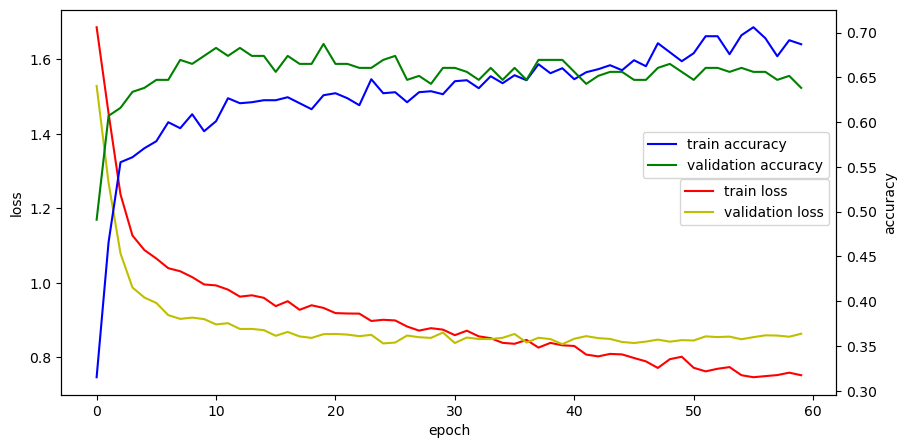

In [130]:
# 학습과정 표시하기
fig, loss_ax = plt.subplots(figsize = (10, 5))
loss_ax.plot(hist.history['loss'], 
             'r', 
             label = 'train loss')
loss_ax.plot(hist.history['val_loss'], 
             'y', 
             label = 'validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 
            'b', 
            label = 'train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 
            'g', 
            label = 'validation accuracy')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc = 'center right')
acc_ax.legend(bbox_to_anchor = (0.999, 0.7))
plt.show()

In [134]:
loss_and_acc = model.evaluate(X_test, Y_test)
print('loss:', loss_and_acc[0])
print('accuracy:', loss_and_acc[1])

15/15 [==============================] - 0s 4ms/step - loss: 0.9259 - accuracy: 0.5979
loss: 0.9259458184242249
accuracy: 0.5979166626930237


### cross tabulation

In [183]:
Y_hat = (model.predict(X_test).argmax(axis = 1) + 3)
Y_test_2 = Y_test.to_numpy().argmax(axis=1) + 3

15/15 [==============================] - 0s 3ms/step


In [186]:
ctab = pd.crosstab(Y_test_2, Y_hat)
ctab.index.name = '실제'
ctab.columns.name = '예측'
ctab

예측,4,5,6,7
실제,,,,
3,0,1,0,0
4,0,12,5,0
5,1,152,37,5
6,0,69,111,20
7,0,1,36,24
8,0,0,3,3


## Model 저장(1)

In [187]:
# 학습된 모델 저장
model.save('model/wine.h5')

In [189]:
# 학습된 모델 load
from tensorflow.keras.models import load_model
model2 = load_model('model/wine.h5')
model2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 64)                768       
                                                                 
 dropout_31 (Dropout)        (None, 64)                0         
                                                                 
 dense_54 (Dense)            (None, 128)               8320      
                                                                 
 dropout_32 (Dropout)        (None, 128)               0         
                                                                 
 dense_55 (Dense)            (None, 32)                4128      
                                                                 
 dropout_33 (Dropout)        (None, 32)                0         
                                                                 
 dense_56 (Dense)            (None, 6)               

## Model 저장(2) 
- 구조만 저장

In [190]:
model_json = model.to_json()
with open('model/wine.json', 'w') as f:
    f.write(model_json)

In [191]:
# 저장된 Model 구성 load
with open('model/wine.json', 'r') as f:
    model_json2 = f.read()

In [193]:
from tensorflow.keras.models import model_from_json
model3 = model_from_json(model_json2)
model3.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 64)                768       
                                                                 
 dropout_31 (Dropout)        (None, 64)                0         
                                                                 
 dense_54 (Dense)            (None, 128)               8320      
                                                                 
 dropout_32 (Dropout)        (None, 128)               0         
                                                                 
 dense_55 (Dense)            (None, 32)                4128      
                                                                 
 dropout_33 (Dropout)        (None, 32)                0         
                                                                 
 dense_56 (Dense)            (None, 6)               

In [194]:
model3.compile(loss = 'categorical_crossentropy',
               optimizer = 'nadam',
               metrics = ['accuracy'])
model3.evaluate(X_test, Y_test)

15/15 [==============================] - 0s 4ms/step - loss: 1.8964 - accuracy: 0.1000


[1.8964221477508545, 0.10000000149011612]

In [197]:
model3.fit(X_train, Y_train,
           epochs = 100, 
           batch_size = 500,
           validation_split = 0.2,
           callbacks = [earlyStopping, customHistory],
           verbose = 0)

epoch: 65
loss: 0.8180148601531982
acc: 0.6715083718299866
val_loss:0.8511492609977722
val_acc: 0.6741071343421936

epoch: 70
loss: 0.8084040284156799
acc: 0.6793296337127686
val_loss:0.8465938568115234
val_acc: 0.6651785969734192

epoch: 75
loss: 0.7937471866607666
acc: 0.6849161982536316
val_loss:0.8298997282981873
val_acc: 0.6830357313156128

epoch: 80
loss: 0.7859137058258057
acc: 0.6826815605163574
val_loss:0.8380847573280334
val_acc: 0.6875

epoch: 85
loss: 0.7915108799934387
acc: 0.6659218072891235
val_loss:0.8394006490707397
val_acc: 0.6830357313156128

epoch: 90
loss: 0.7827069163322449
acc: 0.6648044586181641
val_loss:0.8442358374595642
val_acc: 0.6607142686843872

epoch: 95
loss: 0.7669351696968079
acc: 0.6793296337127686
val_loss:0.8380884528160095
val_acc: 0.6785714030265808



In [198]:
loss_and_acc = model.evaluate(X_test, Y_test)
print('loss:', loss_and_acc[0])
print('accuracy:', loss_and_acc[1])

15/15 [==============================] - 0s 6ms/step - loss: 0.9259 - accuracy: 0.5979
loss: 0.9259458184242249
accuracy: 0.5979166626930237
